Estimated (mu1, sigma1): (0.693693001545956, 1.1031420247274004), (mu2, sigma2): (0.3758141852653341, 1.0434923905044289)


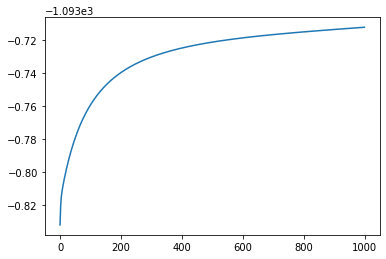

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set random seed so that everytime we get the same result
np.random.seed(1)

# prepare simulation data
N1 = 1000
N2 = 1000
N = N1 + N2
real_mu1 = 0.2
real_std1 = 1
real_mu2 = 0.8
real_std2 = 1
y = np.concatenate((np.random.normal(real_mu1, real_std1, N1), np.random.normal(real_mu2, real_std2, N2)))


# EM algorithm

# Initialization
nits = 1000
count = 0 # should be initialized as 0
p1 = 0.5
p2 = 0.5
mu1 = np.random.random()
mu2 = np.random.random()
s1 = np.std(y)
s2 = s1
ll = np.zeros(nits)
gamma1 = np.zeros(N)
gamma2 = np.zeros(N)

while count < nits:
    count = count + 1
    # E-step
    for i in range(N):
        num1 = p1 * np.exp(-(y[i]-mu1)**2/(2*s1)) / np.sqrt(s1)
        num2 = p2 * np.exp(-(y[i]-mu2)**2/(2*s2)) / np.sqrt(s2)
        gamma1[i] = num1 / (num1 + num2)
        gamma2[i] = num2 / (num1 + num2)
    # M-step
    mu1 = np.sum(gamma1*y) / np.sum(gamma1)
    mu2 = np.sum(gamma2*y) / np.sum(gamma2)
    s1 = np.sum(gamma1*(y-mu1)**2) / np.sum(gamma1)
    s2 = np.sum(gamma2*(y-mu2)**2) / np.sum(gamma2)
    p1 = np.sum(gamma1) / N
    p2 = np.sum(gamma2) / N
    ll[count - 1] = np.sum(np.log(p1*np.exp(-(y-mu1)**2/(2*s1)) / np.sqrt(s1) + p2*np.exp(-(y-mu2)**2/(2*s2)) / np.sqrt(s2)))
    
    
print('Estimated (mu1, sigma1): (%s, %s), (mu2, sigma2): (%s, %s)' % (mu1, s1, mu2, s2))     
plt.plot(range(nits), ll)